# Matplotlib: Some common plot types

This is just a small sample of common plots, taken from the official [gallery](https://matplotlib.org/gallery/index.html), which you should spend a bit of time familiarizing yourself with.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# a few widely used tools from numpy
from numpy import sin, cos, exp, sqrt, pi, linspace, arange

## Error plots


First a very simple error plot

Text(0.5,1,'Simplest errorbars, 0.2 in x, 0.4 in y')

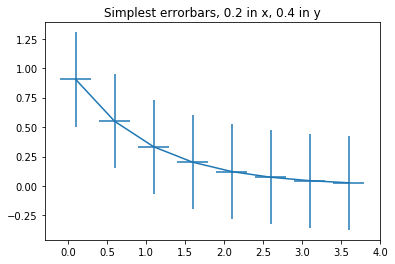

In [2]:
# example data
x = arange(0.1, 4, 0.5)
y = exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

Now a more elaborate one, using the OO interface to exercise more features.

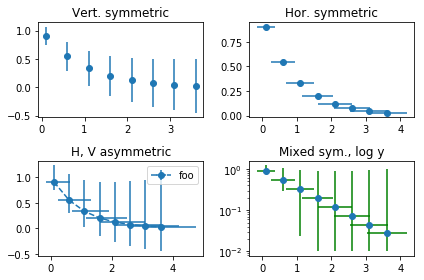

In [3]:
# same data/errors as before
x = arange(0.1, 4, 0.5)
y = exp(-x)
yerr = 0.1 + 0.2*sqrt(x)
xerr = 0.1 + yerr

fig, axs = plt.subplots(nrows=2, ncols=2)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o', label='foo')
ax.legend()
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
                             fmt='o', ecolor='g')
ax.set_title('Mixed sym., log y')

# Fix layout to minimize overlap between titles and marks 
# https://matplotlib.org/users/tight_layout_guide.html
plt.tight_layout()

## Logarithmic plots

A simple log plot

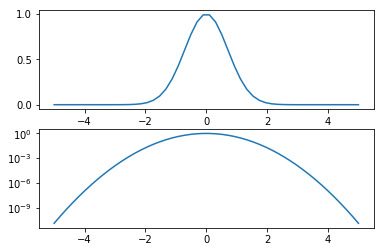

In [4]:
x = linspace(-5, 5)
y = exp(-x**2)

f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x, y)
ax2.semilogy(x, y)

A more elaborate log plot using 'symlog', that treats a specified range as
linear (thus handling values near zero) and symmetrizes negative values:

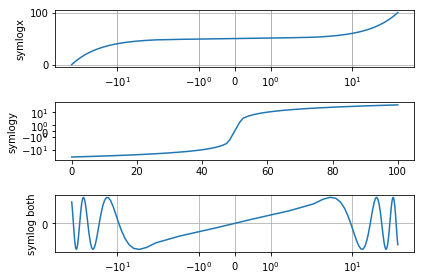

In [5]:
x = linspace(-50, 50, 100)
y = linspace(0, 100, 100)

# Create the figure and axes
f, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Symlog on the x axis
ax1.plot(x, y)
ax1.set_xscale('symlog')
ax1.set_ylabel('symlogx')
# Grid for both axes
ax1.grid(True)
# Minor grid on too for x
ax1.xaxis.grid(True, which='minor')

# Symlog on the y axis
ax2.plot(y, x)
ax2.set_yscale('symlog')
ax2.set_ylabel('symlogy')

# Symlog on both
ax3.plot(x, sin(x / 3.0))
ax3.set_xscale('symlog')
ax3.set_yscale('symlog')
ax3.grid(True)
ax3.set_ylabel('symlog both')
plt.tight_layout()

## Bar plots

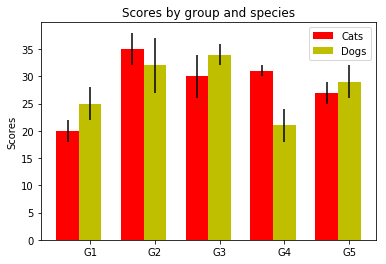

In [6]:
N = 5
catMeans = (20, 35, 30, 31, 27)
catStd =   (2, 3, 4, 1, 2)

ind = arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, catMeans, width, color='r', yerr=catStd, label='Cats')

dogMeans = (25, 32, 34, 21, 29)
dogStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, dogMeans, width, color='y', yerr=dogStd, label='Dogs')

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and species')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )
ax.legend();

## Scatter plots

The ``scatter`` command produces scatter plots with arbitrary markers.

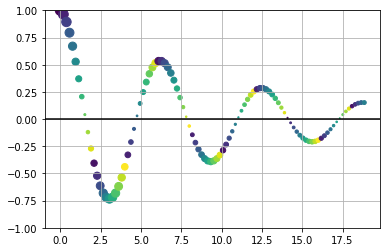

In [7]:
from matplotlib import cm

t = linspace(0.0, 6*pi, 100)
y = exp(-0.1*t)*cos(t)
phase = t % 2*pi
f, ax = plt.subplots()
ax.scatter(t, y, s=100*abs(y), c=phase, cmap=cm.viridis)
ax.set_ylim(-1,1)
ax.grid()
ax.axhline(0, color='k');

## Histograms

Matplotlib has a built-in command for histograms.

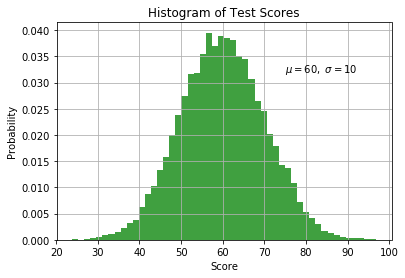

In [8]:
# Some normally-distributed data
mu, sigma = 60, 10
x = np.random.normal(mu, sigma, 10000)

# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Histogram of Test Scores')
plt.text(75, .032, rf'$\mu={mu},\ \sigma={sigma}$')
plt.grid(True)

## Statistical plotting - some builtin capabilities

Some statistically-oriented plots to visualize data distributions: boxplots and violin plots ([this paper](http://vita.had.co.nz/papers/boxplots.pdf) by Hadley Wickham is a good overview of boxplots).

Note that often Seaborn will have a simpler API for rich statistical plots, atop matplotlib's engine. This shows how to do plots of this type *without* seaborn:

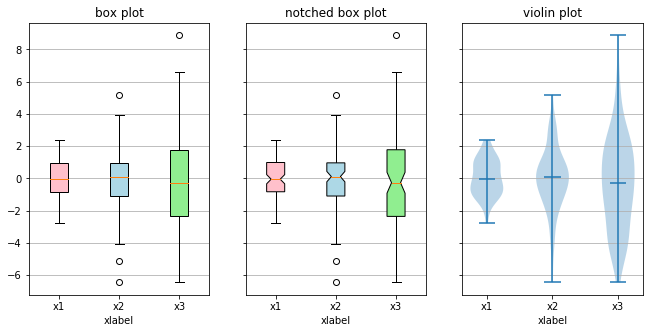

In [9]:
# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 5))

# Box plots
bplots = []
for ax, notch in zip(axes[:2], (False, True)):
    b = ax.boxplot(all_data,
                   notch=notch,
                   vert=True,   # vertical box aligmnent
                   patch_artist=True)   # fill with color
    bplots.append(b)

axes[0].set_title('box plot')
axes[1].set_title('notched box plot')

# Violin plot
vplot = axes[2].violinplot(all_data,
                           showmeans=False,
                           showmedians=True)
axes[2].set_title('violin plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for i, ax in enumerate(axes):
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    if i: ax.set_yticklabels([])

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3']);